# DAMASK tutorial

- creating necessary inputs for damask
- defining the elastoplastic model (with powerlaw) for tensile test
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

Author: Yang Bai

Date  : 23.02.2022

Update: 01.08.2022

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
%matplotlib inline

### create a 'project' to manage all the configurations for a tensile test

In [2]:
pr = Project('RollingTest')
pr.remove_jobs(silently=True, recursive=True) # automatically delete the existing project folder

  0%|          | 0/1 [00:00<?, ?it/s]

### Creating the Damask job

In [3]:
job = pr.create.job.ROLLING('damask_job')

#### for a damask job, one needs:
- geometry information(i.e., the mesh)
- material configuration(material.yaml)
- boundary conditions(i.e., loading.yaml)

### For material configuration
#### for elastoplastic material

In [4]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12],a_sl=[2.25],
                                            atol_xi=1.0,dot_gamma_0_sl=[0.001],
                                            h_0_sl_sl=[75.0e6],
                                            h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=[20],
                                            output=['xi_sl'],
                                            xi_0_sl=[31.0e6],
                                            xi_inf_sl=[63.0e6]
                                           )


#### for material configuration, you need
- phase
- roation
- homogenization

In [5]:
grains = 4
grids = 4

phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity,plasticity=plasticity)
rotation = pr.continuum.damask.Rotation(shape=grains)

homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

# now you can define your material.yaml configuration
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

# now you can save your material to your job
job.material = material

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:164: UserWarning: Setting material via project creator is deprecated. Use job.set_material instead
  warnings.warn(


## For geometry information

In [6]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, spatial_discretization=grids, num_grains=grains)

# save the geometry information to your job
job.grid = grid 

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:216: UserWarning: Setting grid via project creator is deprecated. Use job.set_grid instead
  warnings.warn(


# Define the 1st rolling test

In [7]:
# execute the rolling test
job.set_rolling(reduction_height=0.05, reduction_speed=5.0e-2, reduction_outputs=250 )

In [8]:
job.run()

The job damask_job was saved and received the ID: 7927


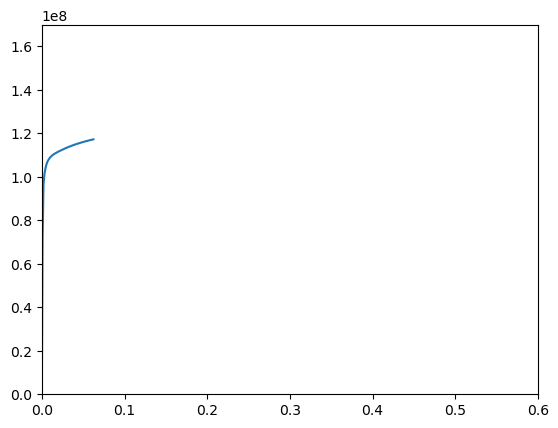

In [9]:
# show the result
job.plotStressStrainCurve(0.0,0.60,0.0,1.7e8) # xmin,xmax, ymin,ymax

# Now, we can do the 2nd rolling test, with different parameters

In [10]:
job = job.restart(job_name=job.job_name + "_2")

In [11]:
job.set_rolling(0.1, 4.5e-2, 300)

The job damask_job_2 was saved and received the ID: 7928


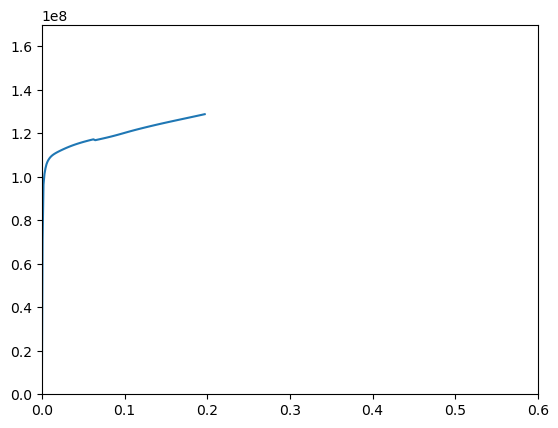

In [12]:
# show the result
job.run() # do the postprocess
job.plotStressStrainCurve(0.0,0.60,0.0,1.7e8) # xmin,xmax, ymin,ymax

# Now, we do the 3rd rolling test with finer mesh (regridding)

In [13]:

# execute the rolling test
job.set_rolling(reduction_height=0.05, reduction_speed=5.0e-2, reduction_outputs=250 )

2024-05-11 07:11:36,293 - pyiron_log - WARNING - The job damask_job_2 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


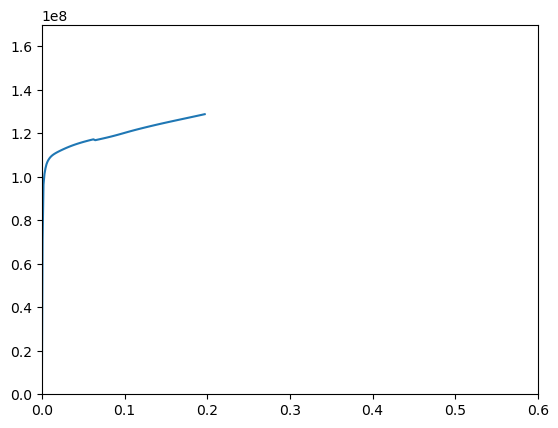

In [14]:
# show the result
job.run() # do the postprocess
job.plotStressStrainCurve(0.0,0.60,0.0,1.7e8) # xmin,xmax, ymin,ymax

# Now, we do the 4th rolling test with even finer mesh (regridding)

In [15]:
# execute the rolling test
job.set_rolling(0.12, 4.25e-2, 300)

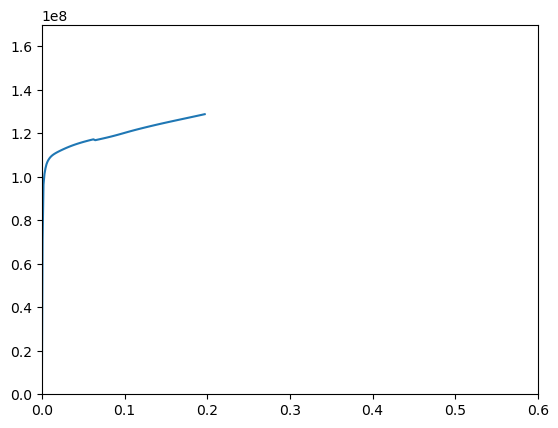

In [17]:
# show the result
job.plotStressStrainCurve(0.0,0.60,0.0,1.7e8) # xmin,xmax, ymin,ymax